In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data using pandas function
df = pd.read_csv('Leads.csv')

In [3]:
# Check dataframe has created
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check dataframe shape
df.shape

(9240, 37)

In [5]:
# Check the numeric values summary of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Nearly all of the information that needs to be examined is provided by the.info() code.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

According to the information above, data contains null values and must be treated as such.

## Step 1: Data Cleaning and Preparation

In [7]:
# Check % of null values present in each columns
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Remove Columns from dataframe having null values > 35%, becasue missing values is huge.

In [8]:
# Drop all the columns having null values greater then 35%
for col in df.columns:
    if df[col].isnull().sum()*100/len(df) > 35:
        df.drop(col, 1, inplace=True)

In [9]:
# Check the null percentange after dropping the columns having high null percentage count
df.isnull().sum()*100/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Now just check out the value count of categorical varaiable in the dataframe to get more understanding of data.

In [10]:
# Retrieve the value counts for each column.
for col in df:
    print(df[col].astype('category').value_counts())
    print('**********************************XX**********************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
**********************************XX**********************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
**********************************XX**********************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead O

Observation from the value count analysis:
- **'TotalVisits','Total Time Spent on Website','Page Views Per Visit'** is are really numeric data type.
- **'Specialization','How did you hear about X Education','Lead Profile','City** contains value Select that is equals to null and Hence can effect the analysis.
- **Do Not Call,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque** --> all the columns contains mostly single type of values for all datapoints which is of no use as per analysis point of view

In [11]:
# Drop the Columns City,Country,Prospect ID,Lead Number which are not mandatory from analysis perspective. 
# And drop 'How did you hear about X Education','Lead Profile' as it contains huge values as 'Select'
df.drop(['City','Country','How did you hear about X Education','Lead Profile','Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [12]:
# Recheck shape to validate the columns are dropped.
df.shape

(9240, 25)

In [13]:
# Drop columns which contains only conatins mostly one type of values for all datapoints
df.drop(['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [14]:
df.shape

(9240, 12)

In [15]:
# Check again the Null value percentage in dataframe
df.isnull().sum()*100/len(df)

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

As we have noticed eariler that column **Specialization** contains aprox 16% of null values and it also conatins **Select** as an input in many filed lets change **Select** to **no_option_selected** as it gives meaning descrption and recheck the percentage again

In [16]:
# Use Replace Menthod 
df = df.replace('Select','no_opt_selected')

In [17]:
# Again check the null percenatage
df.isnull().sum()*100/len(df)

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

Now lets focus on dropping rows which conatins null values
As we can that **What is your current occupation** and **Specialization** consist of approx 30% and 16% of null values. So, lets fill in this with some values.

In [18]:
# Use fillna() function to fill all null values in columns
df['What is your current occupation'] = df['What is your current occupation'].fillna('no_option_selected')
df['Specialization'] = df['Specialization'].fillna('no_option_selected')

In [19]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [20]:
# As count of missing values in dataframe df is low we will drop all the rows which conatins null values
df2 = df[df.isnull().sum(axis=1) <1]

In [21]:
df2.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now, df2 dataframe conatins zero null values.

In [22]:
df2.shape

(9074, 12)

In [23]:
# Lets have a look to cleaned data set
df2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,no_opt_selected,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,no_opt_selected,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,no_opt_selected,Unemployed,No,Modified


In [24]:
# Lets Re-verify the data types of the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

### Visualization of the cleaned data

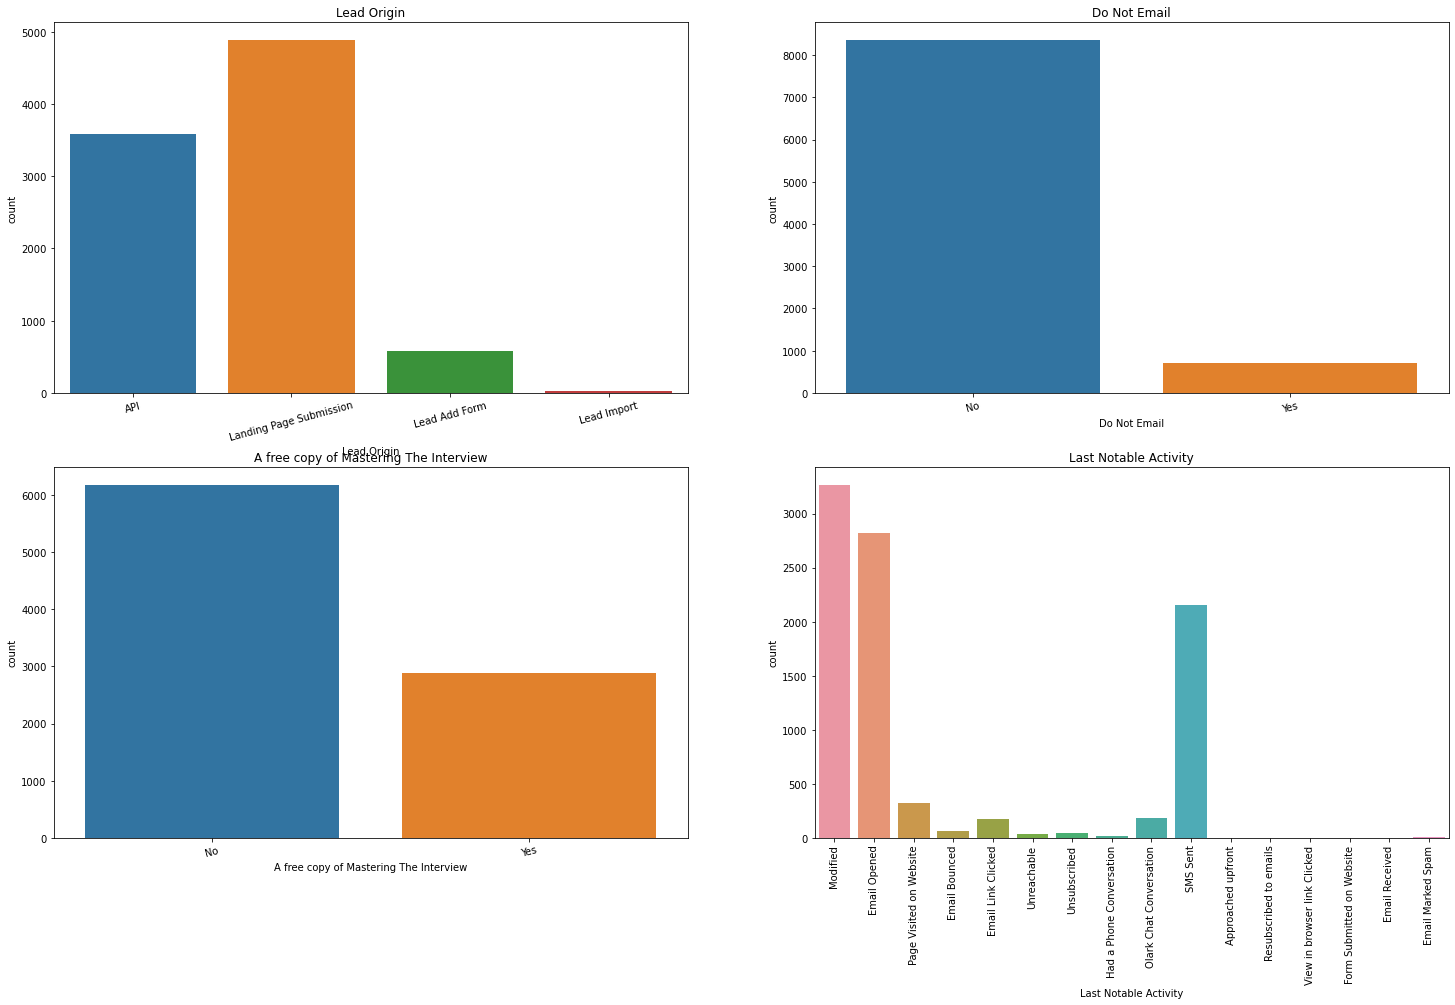

In [25]:
# Univarient analysis on categorical Variables
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.countplot(df2['Lead Origin']).tick_params(axis='x', rotation = 15)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(df2['Do Not Email']).tick_params(axis='x', rotation = 15)
plt.title('Do Not Email')

plt.subplot(2,2,3)
sns.countplot(df2['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 15)
plt.title('A free copy of Mastering The Interview')

plt.subplot(2,2,4)
sns.countplot(df2['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

Text(0.5, 1.0, 'Lead Source')

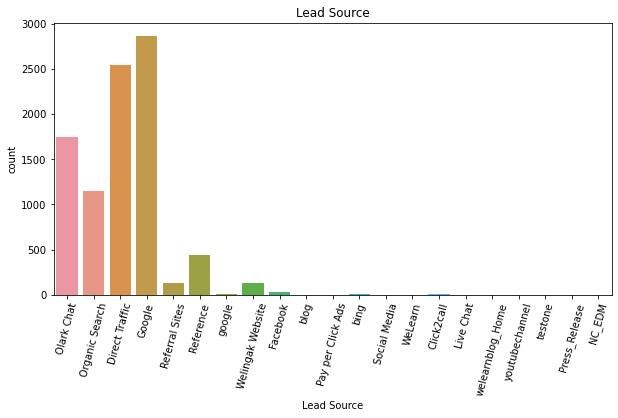

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df2['Lead Source']).tick_params(axis='x', rotation = 75)
plt.title('Lead Source')

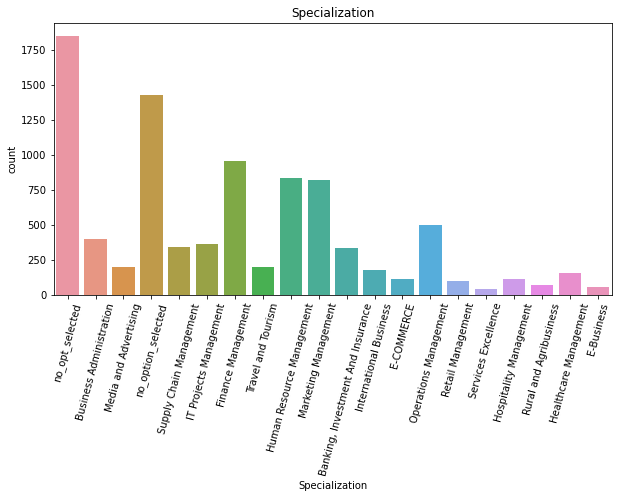

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df2['Specialization']).tick_params(axis='x', rotation = 75)
plt.title('Specialization')
plt.show()

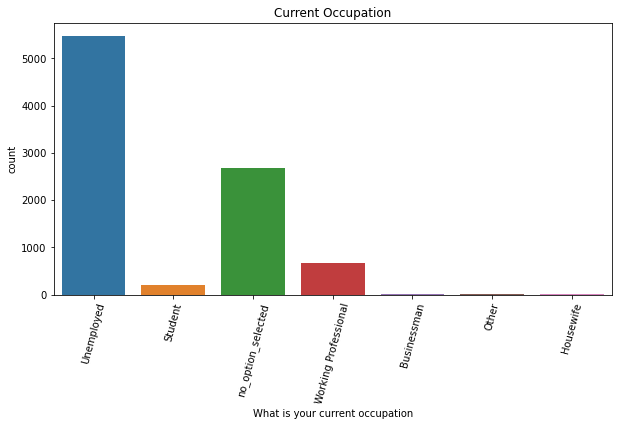

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df2['What is your current occupation']).tick_params(axis='x', rotation = 75)
plt.title('Current Occupation')
plt.show()

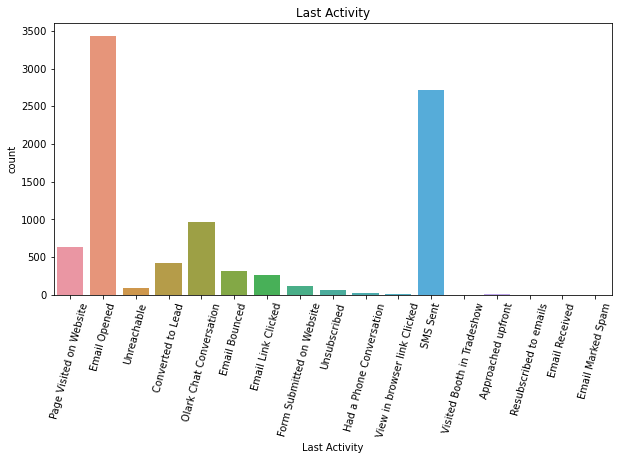

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df2['Last Activity']).tick_params(axis='x', rotation = 75)
plt.title('Last Activity')
plt.show()

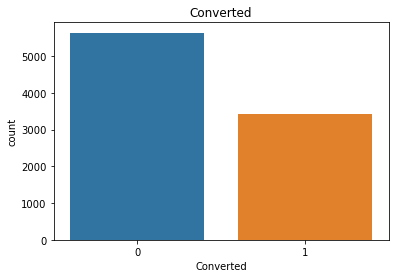

In [30]:
# Target Variable count plot
sns.countplot(df2['Converted'])
plt.title('Converted')
plt.show()

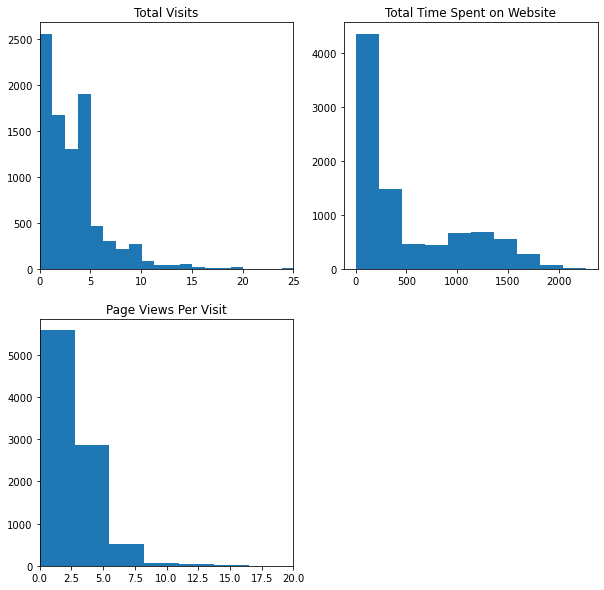

In [31]:
# hist plot for all numeric varaibles in the final dataset
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

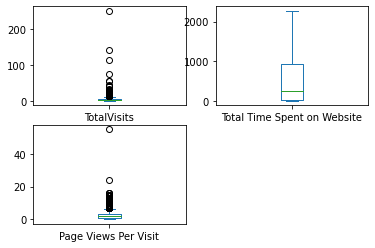

In [32]:
# Check for Outliers in Numeric variables
#plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
df2.TotalVisits.plot.box()
plt.subplot(2,2,2)
df2['Total Time Spent on Website'].plot.box()
plt.subplot(2,2,3)
df2['Page Views Per Visit'].plot.box()
plt.show()

With above box plot we can clear see that there are ourliers in columns **TotalVisits**,**Page Views Per Visit**

In [33]:
numeric = df2[['TotalVisits','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
90%,7.000000,5.000000
99%,17.000000,9.000000
max,251.000000,55.000000


#### Relate Categorical Varaibles with Target Variable

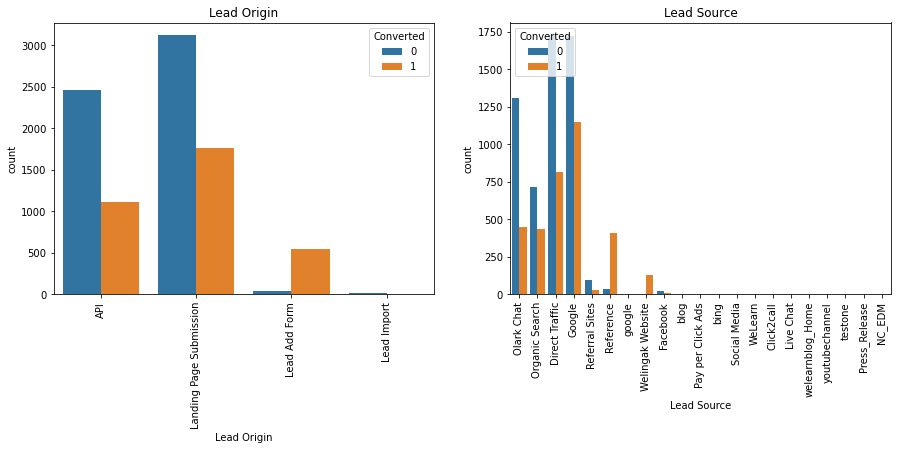

In [34]:
# Converted V/S Lead Origin & Converted V/S Lead Source
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

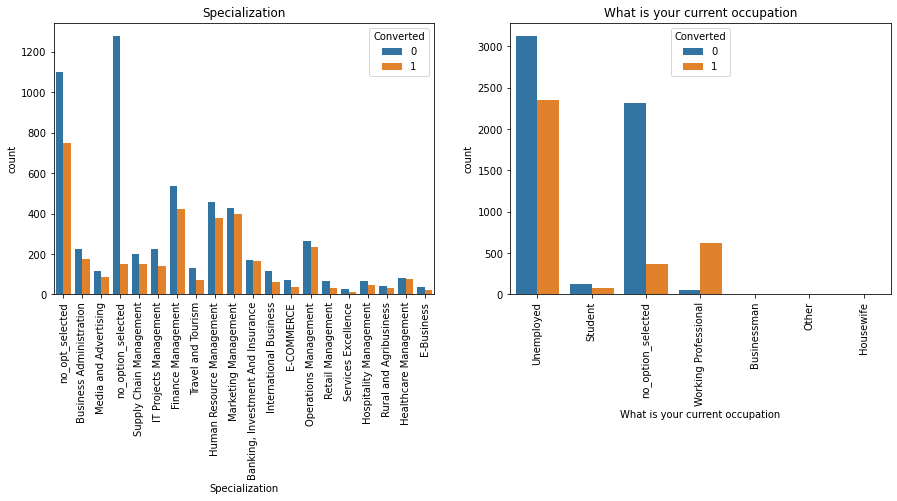

In [35]:
# Target Variable V/S Specialization and What is your current occupation
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

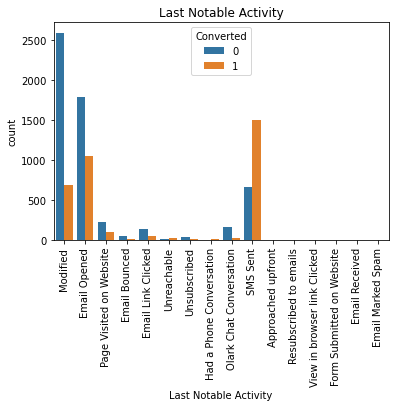

In [36]:
# Target Varibale V/S Last Notable Activity
sns.countplot(x='Last Notable Activity', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

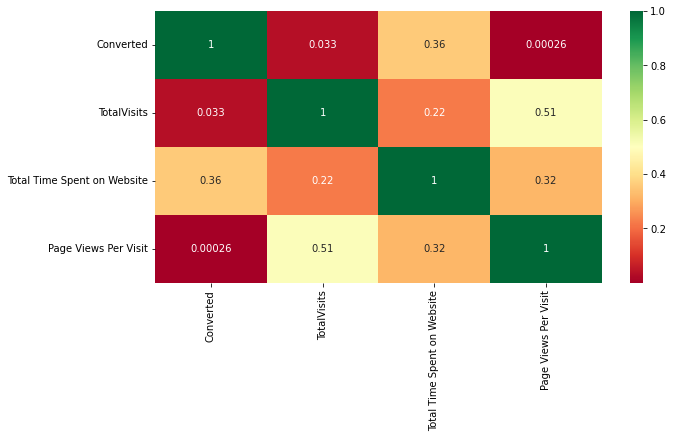

In [37]:
# Check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Dummy variable creation

In [38]:
# Verify the columns that are of the 'object' type.
temp = df2.loc[:, df2.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# The get_dummies() function can be used to create dummy variables.
dummy = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']], drop_first=True)

# Results should be added to the master dataframe.
df2 = pd.concat([df2, dummy], axis=1)

In [40]:
# The variables for which the dummy variables were created should be removed.
df2 = df2.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [41]:
# Let's verify the dataset
df2

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_opt_selected,Specialization_no_option_selected
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

In [42]:
# Import the required library
from sklearn.model_selection import train_test_split

In [43]:
# Assign feature variable to X.
X = df2.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_opt_selected,Specialization_no_option_selected
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Assign target variable in y
y = df2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Divide the dataset into train and test segments of 70% and 30%, respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling
Now, the dataset contains a few numerical variables with various scales. So let's scale these factors right now.

In [46]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_opt_selected,Specialization_no_option_selected
1289,0.014184,0.612676,0.083333,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Check the correlation among varibles
df2.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_opt_selected,Specialization_no_option_selected
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,0.067607,0.011600,0.044953,-0.008391,0.008560,-0.014207,0.020193,-0.008421,0.027796,-0.243578
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,0.023355,0.043954,0.020840,0.037240,0.058073,0.016010,0.062917,0.064095,-0.149231,-0.169194
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,0.068158,0.043215,0.062165,0.028783,0.021763,0.003529,0.050945,0.043377,-0.159623,-0.214545
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,0.056391,0.065992,0.049289,0.045710,0.025669,0.021059,0.064994,0.113364,-0.234792,-0.272872
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.132351,0.100771,0.125445,0.076578,0.056174,0.048271,0.126661,0.111260,-0.506070,-0.436333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Services Excellence,-0.014207,0.016010,0.003529,0.021059,0.048271,-0.010609,-0.003832,0.054781,-0.003896,-0.027345,...,-0.021015,-0.010040,-0.016052,-0.007024,-0.005992,1.000000,-0.013249,-0.010040,-0.033685,-0.028792
Specialization_Supply Chain Management,0.020193,0.062917,0.050945,0.064994,0.126661,-0.023868,-0.001443,0.103825,-0.001795,-0.025199,...,-0.062882,-0.030043,-0.048030,-0.021018,-0.017931,-0.013249,1.000000,-0.030043,-0.100792,-0.086153
Specialization_Travel and Tourism,-0.008421,0.064095,0.043377,0.113364,0.111260,-0.036415,-0.008691,0.018943,-0.008835,-0.052771,...,-0.047655,-0.022768,-0.036400,-0.015928,-0.013589,-0.010040,-0.030043,1.000000,-0.076385,-0.065291
Specialization_no_opt_selected,0.027796,-0.149231,-0.159623,-0.234792,-0.506070,0.122310,0.032780,-0.262906,0.035979,-0.023553,...,-0.159879,-0.076385,-0.122117,-0.053438,-0.045589,-0.033685,-0.100792,-0.076385,1.000000,-0.219044


It is challenging to eliminate variables since there are so many of them. After RFE, we'll proceed.

## Step 2: Model Building

In [48]:
# Import Sklearn Library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [49]:
# Import RFE from sklearn
from sklearn.feature_selection import RFE

In [50]:
# running RFE with 15 variables as output
rfe = RFE(lr, 15)             
rfe = rfe.fit(X_train, y_train)

In [51]:
# Now let's look at the characteristics that RFE has chosen.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 68),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 69),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_blog', False, 35),
 ('Lead Source_google', False, 33),
 ('Lead Source_testone', False, 36),
 ('Lead Source_welearnblog_Home', False, 45),
 ('

In [52]:
# Place all of the columns RFE chose in the variable "col"
col = X_train.columns[rfe.support_]

Now that you have all the variables chosen by RFE, let's utilise them to build a logistic regression model using statsmodels as we are interested in the statistical component, i.e. the p-values and the VIFs.

In [53]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [54]:
# Import statsmodels
import statsmodels.api as sm

In [55]:
# After adding a constant, fit a logistic regression model to X train, then output the summary.
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Fri, 11 Nov 2022   Deviance:                       5254.8
Time:                        21:05:05   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0581      0.106    -19.428      0.000      -2.266      -1.850
TotalVisits                                              6.0485      1.492      4.055      0.000       3.125       8.972
Total Time Spent on Website                              4.6258      0.167     27.671      0.000       4.298       4.954
Lead Origin_Landing Page Submission                     -0.3558      0.090     -3.968      0.000      -0.532      -0.180
Lead Origin_Lead Add Form                                3.4941      0.233     14.964      0.000       3.036       3.952
Lead Source_Olark Chat                                   1.3633      0.125     10.867      0.000       1.117       1.609
Lead Source_Welingak Website                             2.5968      1.033      2.514      0.012       0.572       4.621
Do Not Email_Yes                                        -1.4093      0.171     -8.220      0.000      -1.745      -1.073
Last Activity_Had a Phone Conversation                   0.4998      0.849      0.589      0.556      -1.165       2.164
Last Activity_Olark Chat Conversation                   -1.4409      0.168     -8.566      0.000      -1.771      -1.111
Last Activity_SMS Sent                                   1.2875      0.074     17.370      0.000       1.142       1.433
What is your current occupation_Housewife               24.2817   3.05e+04      0.001      0.999   -5.97e+04    5.97e+04
What is your current occupation_Working Professional     2.5373      0.194     13.107      0.000       2.158       2.917
What is your current occupation_no_option_selected      -1.2097      0.086    -13.998      0.000      -1.379      -1.040
Last Notable Activity_Had a Phone Conversation          23.5521   2.14e+04      0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_Unreachable                        1.8019      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [56]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
7,Last Activity_Had a Phone Conversation,1.89
13,Last Notable Activity_Had a Phone Conversation,1.89
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
12,What is your current occupation_no_option_sele...,1.45
8,Last Activity_Olark Chat Conversation,1.40


The VIF values seem fine but the p-values aren't. So start removing values with high p-value one by one.

In [58]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [59]:
# Refit the modle 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.1
Date:                Fri, 11 Nov 2022   Deviance:                       5262.2
Time:                        21:05:06   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0597      0.106    -19.441      0.000      -2.267      -1.852
TotalVisits                                              6.0994      1.492      4.087      0.000       3.174       9.025
Total Time Spent on Website                              4.6160      0.167     27.642      0.000       4.289       4.943
Lead Origin_Landing Page Submission                     -0.3505      0.090     -3.910      0.000      -0.526      -0.175
Lead Origin_Lead Add Form                                3.4921      0.234     14.952      0.000       3.034       3.950
Lead Source_Olark Chat                                   1.3657      0.125     10.885      0.000       1.120       1.612
Lead Source_Welingak Website                             2.6011      1.033      2.518      0.012       0.577       4.626
Do Not Email_Yes                                        -1.4130      0.171     -8.248      0.000      -1.749      -1.077
Last Activity_Had a Phone Conversation                   1.9215      0.685      2.807      0.005       0.580       3.263
Last Activity_Olark Chat Conversation                   -1.4396      0.168     -8.560      0.000      -1.769      -1.110
Last Activity_SMS Sent                                   1.2872      0.074     17.373      0.000       1.142       1.432
What is your current occupation_Housewife               23.2791   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
What is your current occupation_Working Professional     2.5351      0.194     13.097      0.000       2.156       2.915
What is your current occupation_no_option_selected      -1.2115      0.086    -14.018      0.000      -1.381      -1.042
Last Notable Activity_Unreachable                        1.8015      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
12,What is your current occupation_no_option_sele...,1.45
8,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.19


In [61]:
# Drop 'What is your current occupation_Housewife'
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [62]:
# Refit the modle 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.1
Date:                Fri, 11 Nov 2022   Deviance:                       5272.1
Time:                        21:05:06   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0521      0.106    -19.406      0.000      -2.259      -1.845
TotalVisits                                              6.0334      1.486      4.060      0.000       3.121       8.946
Total Time Spent on Website                              4.6120      0.167     27.644      0.000       4.285       4.939
Lead Origin_Landing Page Submission                     -0.3468      0.090     -3.874      0.000      -0.522      -0.171
Lead Origin_Lead Add Form                                3.4943      0.233     14.975      0.000       3.037       3.952
Lead Source_Olark Chat                                   1.3617      0.125     10.863      0.000       1.116       1.607
Lead Source_Welingak Website                             2.5941      1.033      2.511      0.012       0.570       4.619
Do Not Email_Yes                                        -1.4161      0.171     -8.270      0.000      -1.752      -1.080
Last Activity_Had a Phone Conversation                   1.9152      0.684      2.799      0.005       0.574       3.257
Last Activity_Olark Chat Conversation                   -1.4424      0.168     -8.578      0.000      -1.772      -1.113
Last Activity_SMS Sent                                   1.2816      0.074     17.311      0.000       1.137       1.427
What is your current occupation_Working Professional     2.5297      0.194     13.073      0.000       2.150       2.909
What is your current occupation_no_option_selected      -1.2146      0.086    -14.062      0.000      -1.384      -1.045
Last Notable Activity_Unreachable                        1.7964      0.602      2.984      0.003       0.616       2.976
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
11,What is your current occupation_no_option_sele...,1.45
8,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.19


All of the VIF values are favourable, and each p-value is less than 0.05. We are good to go!

## Step 3: Model Evaluation

In [64]:
# predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.625335
3604    0.129536
5584    0.213186
7679    0.129536
7563    0.476038
7978    0.822380
7780    0.158674
7863    0.982644
838     0.815283
708     0.183713
dtype: float64

In [65]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.62533529, 0.1295355 , 0.2131863 , 0.1295355 , 0.47603756,
       0.82238047, 0.15867431, 0.98264372, 0.81528267, 0.18371277])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [66]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.625335
1,0,0.129536
2,0,0.213186
3,0,0.129536
4,0,0.476038


In [67]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.625335,1
1,0,0.129536,0
2,0,0.213186,0
3,0,0.129536,0
4,0,0.476038,0


In [68]:
#It's time to evaluate the model now that you have the probabilities and have used them to make conversion predictions.
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [69]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3438  457]
 [ 737 1719]]


In [70]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [71]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8119981105337742


In [72]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Calculate the sensitivity
TP/(TP+FN)

0.6999185667752443

In [74]:
# Calculate the specificity
TN/(TN+FP)

0.8826700898587934

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 89%.

### Finding the Optimal Cutoff

Now, the value of 0.5 was chosen at random to check the model's performance. But you must optimise the threshold if you want decent outcomes. So let's first plot a ROC curve.

In [75]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

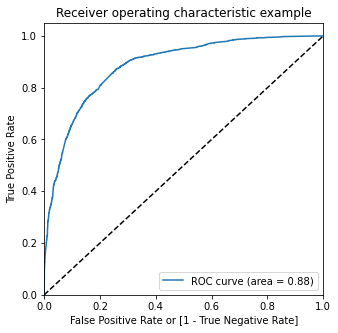

In [77]:
# Call the ROC function using matplotlib
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC's 0.88 area under the curve is a very respectable value. So it appears that we have a sound model.

In [78]:
 # the construction of columns with various probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0


In [79]:
# making a dataframe to see the accuracy, sensitivity, and specificity values at various cutoffs for probability
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#Creating a complex matrix to determine the sensitivity, accuracy, and specificity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.582900  0.982899  0.330680
0.2   0.2  0.760983  0.916531  0.662901
0.3   0.3  0.790899  0.874186  0.738383
0.4   0.4  0.811841  0.768730  0.839024
0.5   0.5  0.811998  0.699919  0.882670
0.6   0.6  0.802236  0.628664  0.911682
0.7   0.7  0.774839  0.506107  0.944288
0.8   0.8  0.753267  0.414495  0.966881
0.9   0.9  0.707605  0.263436  0.987677


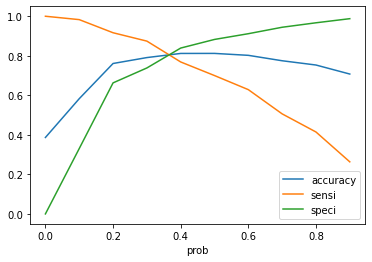

In [80]:
# Let's also plot it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, the three measures are at their best around a value of 0.35. So, let's set 0.35 as our threshold right now.

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0,1


In [82]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017635018107385

In [83]:
# create the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3142,  753],
       [ 506, 1950]], dtype=int64)

In [84]:
# evaluate the other metrics as well
# true positive 
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0] 

In [85]:
# Sensitivity Calculation
TP/(TP+FN)

0.7939739413680782

In [86]:
# Specificity Calculation
TN/(TN+FP)

0.8066752246469833

We have accuracy, sensitivity, and specificity of roughly 80% with the current cut off of 0.35.

## Step 4: Predictions on the Test Set

In [87]:
# Scale numeric values uisng'transform' function
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [88]:
# Substituting all the columns in the final train model
col = X_train.columns

In [89]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_no_option_selected,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,0,0,1,1,0,0
2085,1.0,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,0,0,1,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0,0
8179,1.0,0.170213,0.148768,1,0,0,0,0,0,0,1,0,1,0
6236,1.0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0
5240,1.0,0.078014,0.458627,1,0,0,0,0,0,0,1,0,0,0


In [90]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434703
1,1,0.830560
2,1,0.982644
3,1,0.869866
4,0,0.099441


In [91]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.434703,1
1,1,0.830560,1
2,1,0.982644,1
3,1,0.869866,1
4,0,0.099441,0
...,...,...,...
2718,1,0.105946,0
2719,0,0.350039,1
2720,0,0.129536,0
2721,1,0.812834,1


In [92]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8090341535071612

In [93]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1408,  336],
       [ 184,  795]], dtype=int64)

In [94]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [95]:
# Calculating the sensitivity
TP/(TP+FN)

0.8120531154239019

In [96]:
# Calculating the specificity
TN/(TN+FP)

0.8073394495412844

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

### Precision-Recall View

In [97]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 737, 1719]], dtype=int64)

In [98]:
#Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7899816176470589

In [99]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6999185667752443

With the current cut off as 0.35 we have Precision around 78% and Recall around 70%

### Precision and recall tradeoff

In [100]:
from sklearn.metrics import precision_recall_curve

In [101]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

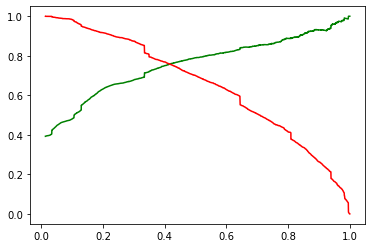

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0,1


In [105]:
# check accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8135726657219335

In [106]:
# create the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3311,  584],
       [ 600, 1856]], dtype=int64)

In [107]:
# true positive 
TP = confusion2[1,1] 
# true negatives
TN = confusion2[0,0] 
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0] 

In [108]:
# Precision = TP / TP + FP
TP/(TP+FP)

0.760655737704918

In [109]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.755700325732899

With the current cut off as 0.42 we have Precision around 76% and Recall around 75%

## Step 4: Predictions on the Test Set

In [110]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434703
1,1,0.830560
2,1,0.982644
3,1,0.869866
4,0,0.099441


In [111]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.434703,1
1,1,0.830560,1
2,1,0.982644,1
3,1,0.869866,1
4,0,0.099441,0
...,...,...,...
2718,1,0.105946,0
2719,0,0.350039,0
2720,0,0.129536,0
2721,1,0.812834,1


In [112]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8182152038193169

In [113]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1485,  259],
       [ 236,  743]], dtype=int64)

In [114]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7415169660678643

In [117]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7589376915219612

With the current cut off as 0.42 we have Precision around 74% and Recall around 75%